In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:

# Load the training and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


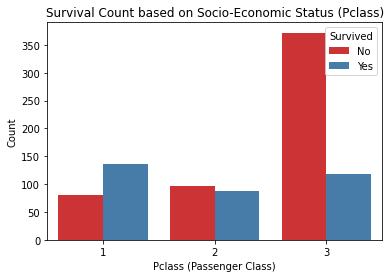

In [4]:
# Visualizing survival based on socio-economic status (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='Set1')
plt.title('Survival Count based on Socio-Economic Status (Pclass)')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


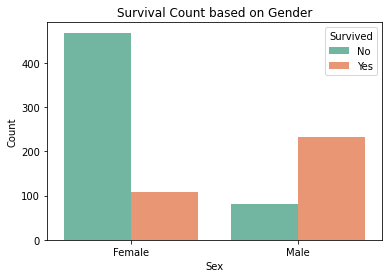

In [5]:
# Visualizing survival based on gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_data, palette='Set2')
plt.title('Survival Count based on Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()


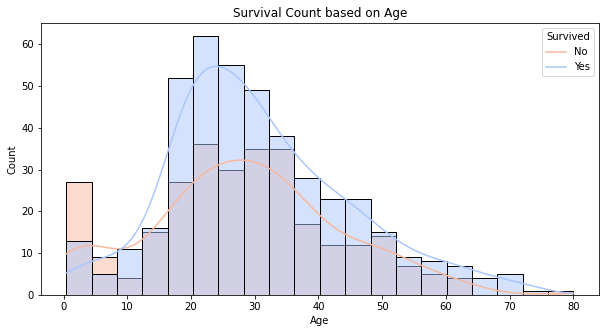

In [6]:
# Visualizing survival based on age
plt.figure(figsize=(10, 5))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True, palette='coolwarm')
plt.title('Survival Count based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


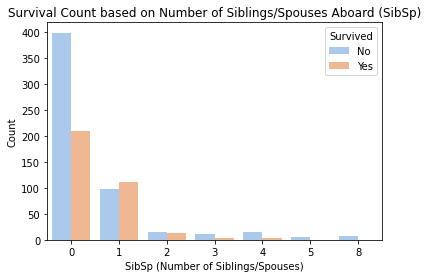

In [7]:

# Visualizing survival based on number of siblings/spouses aboard (SibSp)
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', hue='Survived', data=train_data, palette='pastel')
plt.title('Survival Count based on Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp (Number of Siblings/Spouses)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


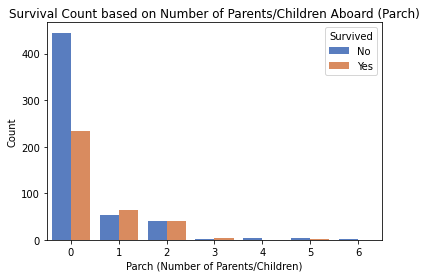

In [8]:
# Visualizing survival based on number of parents/children aboard (Parch)
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', hue='Survived', data=train_data, palette='muted')
plt.title('Survival Count based on Number of Parents/Children Aboard (Parch)')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [9]:
# Drop columns that are not likely to be useful for prediction
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [10]:
# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


In [11]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)


In [12]:
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])


In [13]:
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])
test_data['Embarked'] = label_encoder.fit_transform(test_data['Embarked'])


In [14]:
# Separate features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']


In [15]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Create the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)


In [17]:
# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Predict on the validation set
y_pred = model.predict(X_val)


In [19]:
# Calculate accuracy score
accuracy = accuracy_score(y_val, y_pred)


In [20]:
print("Accuracy:", accuracy)


Accuracy: 0.8212290502793296


In [21]:
# Predict on the test set
predictions = model.predict(test_data)


In [22]:
# Create a DataFrame to store the predictions and save it as a CSV file
prediction_data = pd.DataFrame({'PassengerId': pd.read_csv('test.csv')['PassengerId'], 'Survived': predictions})
prediction_data.to_csv('titanic_predictions.csv', index=False)


In [23]:
# Provide a download link for the prediction data CSV file
from IPython.display import FileLink
FileLink('titanic_predictions.csv')


c:\Users\ss\OneDrive\Desktop\Titanic-Survival-Classification\titanic_predictions.csv